In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load merged/cleaned dataset
crime_df = pd.read_csv("../../Data/cleaned_data/cleaned_data_2015_2018/all_data_merged_cleaned_2015_2018.csv")
crime_df.head()

,event_unique_id,crime,occ_year,occ_month,occ_day,occ_dow,occ_hour,premises_type,hood_140,neighbourhood_140,long_wgs84,lat_wgs84,date
0,GO-20155154,assault,2015,January,1,Thursday,23,House,115,Mount Dennis (115),-79.504668,43.693238,2015-01-01
1,GO-20151233,assault,2015,January,1,Thursday,3,Commercial,77,Waterfront Communities-The Island (77),-79.392855,43.647315,2015-01-01
2,GO-2015862,assault,2015,January,1,Thursday,2,Commercial,77,Waterfront Communities-The Island (77),-79.387700,43.649776,2015-01-01
3,GO-2015182,assault,2015,January,1,Thursday,0,Commercial,1,West Humber-Clairville (1),-79.595562,43.686751,2015-01-01
4,GO-2015276,assault,2015,January,1,Thursday,0,Outside,77,Waterfront Communities-The Island (77),-79.400096,43.645835,2015-01-01


In [4]:
# How many different crime types in df? 
crime_df["crime"].nunique()

9

In [5]:
# Any null values in rows?
crime_df.isnull().sum()

event_unique_id        0
crime                  0
occ_year               0
occ_month              0
occ_day                0
occ_dow                0
occ_hour               0
premises_type        382
hood_140               0
neighbourhood_140      0
long_wgs84             0
lat_wgs84              0
date                   0
dtype: int64

In [6]:
# Look at PREMISES_TYPE column with null values
crime_df[crime_df["premises_type"].isna()]

,event_unique_id,crime,occ_year,occ_month,occ_day,occ_dow,occ_hour,premises_type,hood_140,neighbourhood_140,long_wgs84,lat_wgs84,date
116458,GO-201523884,shooting,2015,January,5,Monday,12,NaN,111,Rockcliffe-Smythe (111),-79.482147,43.678077,2015-01-05
116459,GO-20151030866,shooting,2015,June,19,Friday,8,NaN,73,Moss Park (73),-79.369685,43.659085,2015-06-19
116460,GO-2015124471,shooting,2015,January,22,Thursday,0,NaN,33,Clanton Park (33),-79.436720,43.748257,2015-01-22
116461,GO-20151080890,shooting,2015,June,27,Saturday,0,NaN,17,Mimico (includes Humber Bay Shores) (17),-79.487345,43.617274,2015-06-27
116462,GO-20151971722,shooting,2015,November,17,Tuesday,9,NaN,14,Islington-City Centre West (14),-79.561473,43.647659,2015-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166507,GO-20181887731,homicide,2018,October,12,Friday,0,NaN,75,Church-Yonge Corridor (75),-79.376699,43.656958,2018-10-12
166508,GO-20181923388,homicide,2018,October,18,Thursday,0,NaN,120,Clairlea-Birchmount (120),-79.286292,43.699070,2018-10-18
166509,GO-20181939006,homicide,2018,October,20,Saturday,0,NaN,124,Kennedy Park (124),-79.264551,43.732765,2018-10-20
166510,GO-20182113063,homicide,2018,November,16,Friday,0,NaN,73,Moss Park (73),-79.369005,43.654614,2018-11-16


In [7]:
# Look at overall shape of dataset
# 1,811 null values out of 480,903 rows for PREMISES_TYPE
crime_df.shape

(166512, 13)

In [8]:
# Find date range of dataset
crime_df["date"].min()

'2015-01-01'

In [9]:
crime_df["date"].max()

'2018-12-31'

In [12]:
# How many different neighbourhoods in this dataset? 
crime_df["neighbourhood_140"].nunique()

144

<AxesSubplot:>

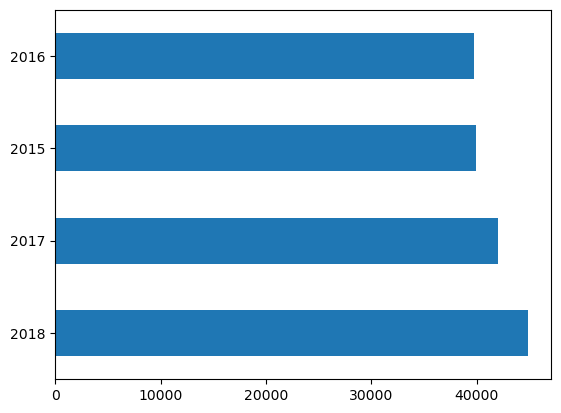

In [10]:
# Nbr of crimes by year
crime_df["occ_year"].value_counts().plot(kind="barh")

<AxesSubplot:>

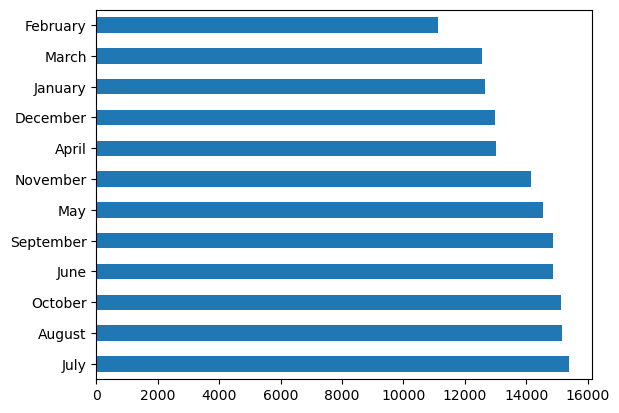

In [11]:
# Nbr of crimes per month (across all years)
crime_df["occ_month"].value_counts().plot(kind="barh")


In [12]:
crime_counts = crime_df["crime"].value_counts()
crime_counts

assault                     64313
theft_from_motor_vehicle    33881
break_and_enter             27086
auto_theft                  13781
bicycle_theft               12448
robbery                     11278
theft_over                   3343
shooting                      269
homicide                      113
Name: crime, dtype: int64

In [13]:
labels = ["traffic_collision", "assault", "theft_from_motor_vehicle", "break_and_enter", "robbery", "auto_theft", "bicycle_theft", "theft_over", "shooting", "homicide"]

In [ ]:
# Pie chart of nbr of crimes by type 
plt.pie(crime_df["crime"].value_counts(), labels = labels, textprops={'fontsize': 8}, autopct='%1.1f%%')
plt.show()

# Consider removing traffic collisions? Obvious that they will be influenced by weather. 
# Original dataset had traffic collisions, it has now been removed

In [16]:
# Explore weather data 
weather_df = pd.read_csv("../../Data/cleaned_data/cleaned_data_2015_2018/toronto_daily_weather_2015_2018.csv")
weather_df.head()

,date,max_temperature,min_temperature,max_relative_humidity,avg_relative_humidity,avg_pressure_sea,max_wind_speed,precipitation,rain,snow,snow_on_ground,daylight,avg_cloud_cover_8
0,2018-12-31,5.0,-2.5,94,79.5,100.78,21,13.6,13.6,0.0,0.0,8.98,4.5
1,2018-12-30,0.7,-6.6,88,78.0,102.03,24,1.2,0.0,1.6,2.0,8.97,5.0
2,2018-12-29,2.7,-7.0,80,68.0,101.86,34,0.0,0.0,0.0,0.0,8.95,4.5
3,2018-12-28,12.4,2.7,95,84.5,100.89,30,1.8,1.8,0.0,0.0,8.93,4.5
4,2018-12-27,2.8,-7.4,87,74.0,102.52,30,5.4,5.4,0.0,0.0,8.93,4.0


In [17]:
# How big is dataset
weather_df.shape

(1461, 13)

In [18]:
# Max temp in Toronto
weather_df["max_temperature"].max()

36.0

In [19]:
# Min temp in Toronto
weather_df["min_temperature"].min()

-26.3

In [20]:
# How many blanks 
weather_df.isnull().sum()

date                     0
max_temperature          0
min_temperature          0
max_relative_humidity    0
avg_relative_humidity    0
avg_pressure_sea         0
max_wind_speed           0
precipitation            0
rain                     0
snow                     0
snow_on_ground           0
daylight                 0
avg_cloud_cover_8        0
dtype: int64